# Week1 HW: Polynomial Regression

__데이터 개수 n에 따라 모델 복잡도 p의 관계__를 간단한 다항식 회귀 모형을 통해 알아보는 것이 목표. 여기서 다항식의 차수 d를 결정하는 것은 결국 모든 모델에서 "모델을 얼마나 복잡하게 만들 것이냐"를 결정하는 것과 같은 맥락. 데이터 개수를 적당히 봐가면서 복잡하게 해야지, 데이터도 적은데 쓸데없이 복잡한 모델을 만들면 __Train set에 과적화가 되어버린다__라는 결과를 직접 확인해보자.

In [2]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [3]:
import os
os.getcwd()

'C:\\Users\\bunga\\Jiwoo\\1. 연세대학교\\1. 연도별\\2020\\ESC\\_pythonCode'

In [4]:
os.chdir('data')

In [5]:
# Importing the dataset
bike = pd.read_csv('day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


## 데이터 들여다보기

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


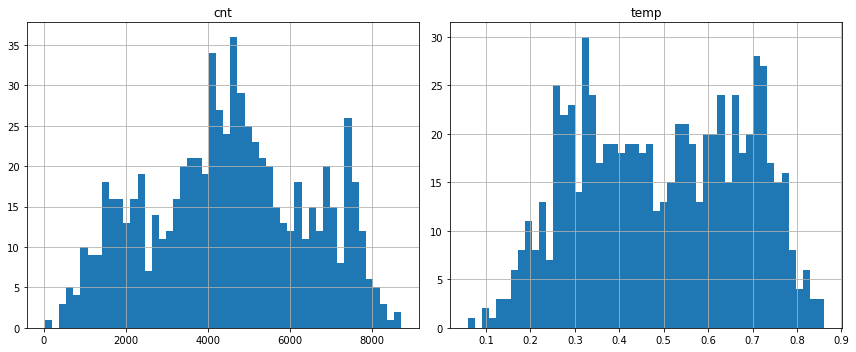

In [8]:
Data.hist(bins=50, figsize=(12,5))
plt.tight_layout()
plt.show()

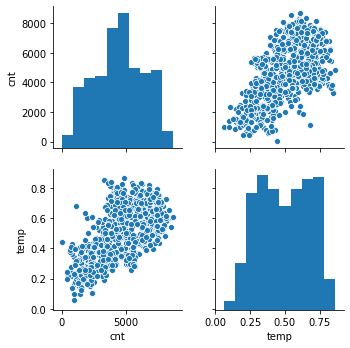

In [9]:
sns.pairplot(Data)

## Polynomial Regression

In [10]:
data = Data.sample(n=30).reset_index()

### 1) Train-Test Split

In [25]:
N = data.shape[0]
test = np.random.choice(np.arange(N), 20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


Tip: 정신 건강을 위해 데이터를 행렬 형태로 만드는게 편리함. R에서는 그냥 이런거 신경 안 쓰고 평화롭게 살았지만 파이썬에서는 Series로 된 거는 꼭 Array로 바꿔줘야 함. 또 sklearn을 쓸때는 행/열 개수 shape을 신경써야 하기 떄문에 ```train_df['temp'][:,np.newaxis] ```로 열벡터로 만들던가 아니면 차라리 그냥 matrix로 만드는게 편함.

Tip: 데이터의 차원이 서로 같은지 잘 확인해야 함! 잘못하면 열벡터와 열벡터를 빼야하는데 열벡터와 행벡터를 빼버려 Numpy가 지 멋대로 Broadcasting해버리는 경우이 있다! R에서는 이런거 신경 안 써도 됐었는데 하...

In [26]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

##### 이렇게 해도 되지 않나?? (SELF)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['temp'], data['cnt'], test_size=2/3)

### 2) Design Matrix 만들기

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly.shape

(10, 3)

Design Matrix를 만들 때, __인터셉트 항이 이미 포함__되어있다는 것을 기억하자.

### 3) Linear Regression Fitting

R하고 좀 다르다. 파이썬은 극한의 객체지향프로그래밍답게 sklearn에서도 모델이 하나의 객체로 저장된다고 생각하자. 밑에서 lin2 = LinearRegression()를 하는 순간 lin2라는, 모델의 껍데기가 형성된다. 거기에 lin2.fit(X, y)를 하면, 그 껍데기 안에 데이터가 채워져서 fitting이 된 모델이 저장되는 것. 그러고나서 lin2.coef_으로 계수 추정치를 얻고, lin2.predict으로 예측을 하는 것.

In [29]:
lin2 = LinearRegression(fit_intercept=False)
lin2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

이렇게 fitting이 된 모델이 탄생한 거다. 이제 하고 싶은거 다 해라. fit_intercept=False으로 설정한 이유는 우리가 이미 Design Matrix를 마늗ㄹ 때 절편항을 포함시켰기 때문이다.

In [30]:
lin2.coef_

array([[ -1524.484,  18139.811, -12760.423]])

In [31]:
y_pred2 = lin2.predict(X_train_poly)

- MSE 계산해보기(SELF)

In [32]:
from sklearn.metrics import mean_squared_error 

In [33]:
np.log(mean_squared_error(y_train, y_pred2))

13.072384489440333

---------------

# HW: Polynomial Regression에서 다음과 같은 그래프 그려보기

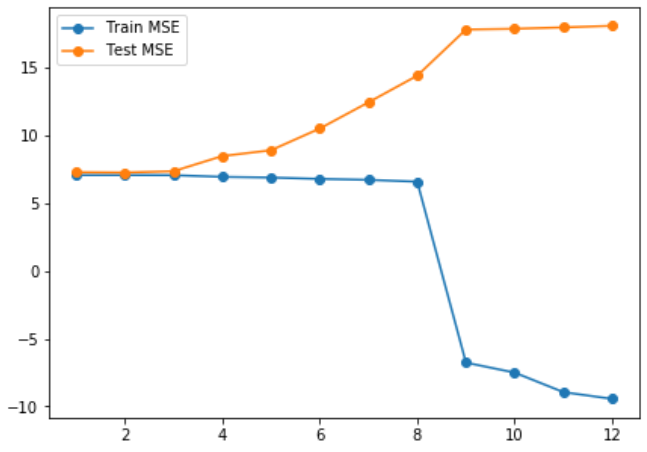

In [34]:
def calculateTrainMSE(i):
    lin = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    lin.fit(X_train_poly, y_train)
    y_pred = lin.predict(X_train_poly)
    return np.log(mean_squared_error(y_train, y_pred))

In [35]:
def calculateTestMSE(i):
    lin = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    lin.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)
    y_pred = lin.predict(X_test_poly)
    return np.log(mean_squared_error(y_test, y_pred))

In [36]:
model_compx = [x for x in np.arange(1,13)]
y_TestMSE = [calculateTestMSE(y) for y in np.arange(1,13)]
y_TrainMSE = [calculateTrainMSE(y) for y in np.arange(1,13)]

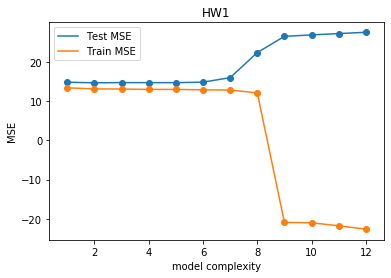

In [37]:
plt.scatter(model_compx, y_TestMSE)
plt.plot(model_compx, y_TestMSE, label='Test MSE')
plt.scatter(model_compx, y_TrainMSE)
plt.plot(model_compx, y_TrainMSE, label='Train MSE')
plt.title('HW1')
plt.xlabel('model complexity')
plt.ylabel('MSE')
plt.legend()
plt.show()

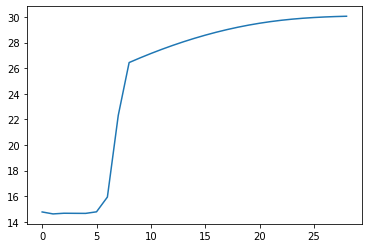

In [38]:
# 그냥 궁금해서 좀 더 높은 차수까지 해봄.
curious = [calculateTestMSE(a) for a in range(1,30)]
plt.plot(curious)

-----------
# 다른 코드 써서 시도해보기 (미완성)

In [222]:
import statsmodels.api as sm

In [224]:
data.head()

,index,cnt,temp
0,363,2999,0.312
1,379,2311,0.167
2,166,3767,0.628
3,50,1812,0.285
4,263,4352,0.595


In [225]:
target = data['cnt']
temp = data['temp']

In [226]:
temp1 = sm.add_constant(temp, has_constant='add')

C:\Users\bunga\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [228]:
model1 = sm.OLS(target, temp1)
fitted_model1 = model1.fit()

In [230]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     21.99
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           6.49e-05
Time:                        15:06:23   Log-Likelihood:                -253.39
No. Observations:                  30   AIC:                             510.8
Df Residuals:                      28   BIC:                             513.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1558.5763    569.656      2.736      0.011     391.689    2725.464
temp        4930.5436   1051.523      4.689      0.000    2776.597    7084.490
==============================================================================
Omnibus:                        4.015   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                2.835
Skew:                           0.743   Prob(JB):                        0.242
Kurtosis:                       3.249   Cond. No.                         6.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
pred1=fitted_model1.predict(temp1)

In [232]:
pred1

0     3095.264
1     2380.335
2     4656.600
3     2964.851
4     4492.250
5     5355.095
6     5005.850
7     3732.123
8     3374.658
9     3641.731
10    2699.031
11    5638.601
12    3411.637
13    5330.442
14    2622.750
15    5544.097
16    4792.190
17    3267.833
18    4697.691
19    4323.788
20    4225.177
21    5067.481
22    4471.704
23    2943.236
24    2561.833
25    2869.277
26    4130.678
27    5244.158
28    5051.043
29    3485.595
dtype: float64

In [233]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train, y_test = train_test_split(data['temp'], data['cnt'], test_size=2/3)

In [236]:
def calculateTrainMSE(i):
    lin = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    lin.fit(X_train_poly, y_train)
    y_pred = lin.predict(X_train_poly)
    return np.log(mean_squared_error(y_train, y_pred))

In [237]:
def calculateTestMSE(i):
    lin = LinearRegression(fit_intercept=False)
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    lin.fit(X_train_poly, y_train)
    X_test_poly = poly.fit_transform(X_test)
    y_pred = lin.predict(X_test_poly)
    return np.log(mean_squared_error(y_test, y_pred))

In [238]:
model_compx = [x for x in np.arange(1,13)]
y_TestMSE = [calculateTestMSE(y) for y in np.arange(1,13)]
y_TrainMSE = [calculateTrainMSE(y) for y in np.arange(1,13)]

ValueError: Expected 2D array, got 1D array instead:
array=[0.347 0.808 0.77  0.637 0.391 0.628 0.285 0.765 0.522 0.699].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
plt.scatter(model_compx, y_TestMSE)
plt.plot(model_compx, y_TestMSE, label='Test MSE')
plt.scatter(model_compx, y_TrainMSE)
plt.plot(model_compx, y_TrainMSE, label='Train MSE')
plt.title('HW1')
plt.xlabel('model complexity')
plt.ylabel('MSE')
plt.legend()
plt.show()